In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.svm import LinearSVC, SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
input_file = 'income_data.txt'

In [3]:
X = []
y = []
count_class1 = 0
count_class2 = 0
max_datapoints = 25000

In [4]:
with open(input_file, 'r') as f:
    for line in f.readlines():
        if count_class1 >= max_datapoints and count_class2 >= max_datapoints:
            break

        if '?' in line:
            continue

        data = line[:-1].split(',')
        # print(data)

        if data[-1] == ' <=50K' and count_class1 < max_datapoints:
            X.append(data)
            count_class1 += 1

        if data[-1] == ' >50K' and count_class2 < max_datapoints:
            X.append(data)
            count_class2 += 1

In [5]:
X = np.array(X)

In [6]:
label_encoder = []
X_encoded = np.empty(X.shape)
for i, item in enumerate(X[0]):
    if item.isdigit():
        X_encoded[:, i] = X[:, i]
    else:
        label_encoder.append(preprocessing.LabelEncoder())
        X_encoded[:, i] = label_encoder[-1].fit_transform(X[:, i])

X = X_encoded[:, :-1].astype(int)
y = X_encoded[:, -1].astype(int)

In [7]:
classifiers = {
    'Linear SVM': LinearSVC(random_state=0),
    'RBF SVM': SVC(kernel='rbf', random_state=0),
    'Poly SVM (degree=3)': SVC(kernel='poly', degree=3, random_state=0),
    'Sigmoid SVM': SVC(kernel='sigmoid', random_state=0)
}

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [9]:
for classifier in classifiers.items():
    print(f'\nClassifier: {classifier[0]}')
    clf = OneVsRestClassifier(classifier[1])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    print(f'Акуратність: {accuracy*100:.2f}%')
    print(f'Точність: {precision*100:.2f}%')
    print(f'Повнота: {recall*100:.2f}%')
    print(f'F1: {f1*100:.2f}%')
    print('-' * 40)


Classifier: Linear SVM
Акуратність: 78.34%
Точність: 76.88%
Повнота: 78.34%
F1: 74.32%
----------------------------------------

Classifier: RBF SVM
Акуратність: 74.64%
Точність: 55.71%
Повнота: 74.64%
F1: 63.80%
----------------------------------------

Classifier: Poly SVM (degree=3)
Акуратність: 74.64%
Точність: 55.71%
Повнота: 74.64%
F1: 63.80%
----------------------------------------

Classifier: Sigmoid SVM
Акуратність: 63.82%
Точність: 63.56%
Повнота: 63.82%
F1: 63.68%
----------------------------------------


In [10]:
input_data = ['37', ' Private', ' 215646', ' HS-grad', ' 9', ' Never-married', ' Handlers-cleaners', ' Not-in-family', ' White', ' Male', ' 0', ' 0', ' 40', ' United-States']

In [11]:
input_data_encoded = [-1] * len(input_data)
count = 0
for i, item in enumerate(input_data):
    if item.isdigit():
        input_data_encoded[i] = int(item)
    else:
        input_data_encoded[i] = label_encoder[count].transform([item])[0]
        count += 1

input_data_encoded = np.array(input_data_encoded).reshape(1, -1)

In [12]:
for classifier in classifiers.values():
    print(f'\nClassifier: {classifier.__class__.__name__}')
    classifier.fit(X, y)
    predicted_class = classifier.predict(input_data_encoded)
    print(label_encoder[-1].inverse_transform(predicted_class)[0])


Classifier: LinearSVC
 <=50K

Classifier: SVC
 <=50K

Classifier: SVC
 <=50K

Classifier: SVC
 <=50K


In [13]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 

In [14]:
models = {
    'Logistic Regression': OneVsRestClassifier(LogisticRegression(solver='liblinear')),
    'Decision Tree': DecisionTreeClassifier(random_state=0),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Gaussian Naive Bayes': GaussianNB(),
    # 'Support Vector Classifier': SVC(gamma='auto') дуже повільно
}

results = []
names = []

for name, model in models.items():
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Logistic Regression: 0.778896 (0.008215)
Decision Tree: 0.799245 (0.008474)
K-Nearest Neighbors: 0.745534 (0.007496)
Linear Discriminant Analysis: 0.780927 (0.006017)
Gaussian Naive Bayes: 0.797132 (0.006025)


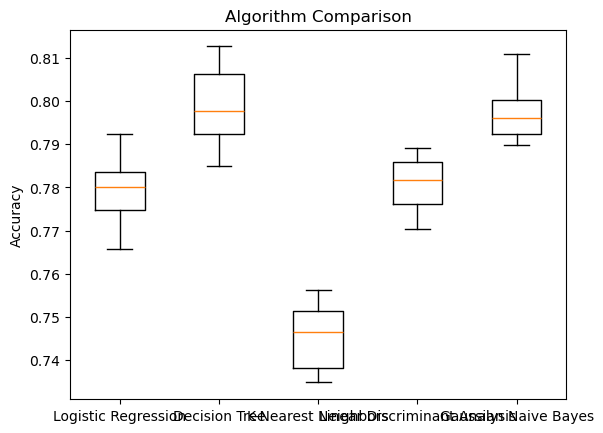

In [15]:
plt.boxplot(results, tick_labels=names)
plt.title('Algorithm Comparison')
plt.ylabel('Accuracy')
plt.show()